# CIS 545 Final Project: Introduction

Hey! It's Arisht, Arnav and Salam, and this is our project!

Our project aims to understand the behaviour of financial institutions in regards to **Loan Approvals or Denials and Loan Payment Difficulties**. Given a dataset that includes many features and attributes of about ~300,000 loan applicants, we proceeded by analyzing these applicants and applying several models in order to gain insight into the financial facet of loans. There seems to be many factors that affect the prospect of approving a loan, and our project dives more into understanding these underlying depths. At the end, we will have developed some models that are able to predict whether an applicant will end up having difficulties in paying back the loan or not based on a number of features. 

We hope you enjoy reading through our work!

# Libraries and Setup

Before we deal with the datasets, we want to run the following cell to load all the libraries that we will be using in our project. 

In [1]:
# Importing relevant libraries
import shutil
import glob
import seaborn as sns
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import warnings

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
import sklearn.metrics as metrics
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingClassifier
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.tree import plot_tree

from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier

from sklearn.model_selection import GridSearchCV

## Loading the Datasets
Our Kaggle datasets can be found at this [link](https://www.kaggle.com/datasets/gauravduttakiit/loan-defaulter)

The application_data.csv file provides us with our main dataset that outlines the loan applicants along with multiple attributes and features. Our 'TARGET' variable is 1 when the client is dealing with payment difficulties, and is 0 otherwise. 

The columns_description.csv file provides us with a dataset that gives further description for the columns in the application dataset above.

In [2]:
# Retrieving dataset
application_df = pd.read_csv('application_data.csv')
columns_df = pd.read_csv('columns_description.csv')

In [3]:
#Take a look at the dataset
application_df.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
#Take a look at the dataset
#We are only interested in the descriptions for the columns in application_data
columns_df = columns_df[columns_df.Table == 'application_data']
columns_df.head(4)

,Unnamed: 0,Table,Row,Description,Special
0,1,application_data,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_data,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_data,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_data,CODE_GENDER,Gender of the client,NaN


In [5]:
#Check datatypes and size
print(application_df.info(verbose = True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244655 entries, 0 to 244654
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

We can clearly see that most of the columns denote numerical variables, whereas the rest of the columns denote categorical variables that refer to gender, occupation type and so on. These differences in the data types of our variables will have to be accounted for when we get to the modeling. 

# Exploratory Data Analysis (EDA)
The first step in our analysis involves performing exploratory data analysis on the application dataset shown above. 

## Dropping Some Columns
Since our dataset contains 122 columns, we need to drop the columns that provide no valuable insight into the scope of our project. To identify these columns, we first chose to take a look at the columns that have a considerable number of null (empty) values (>50% in our case). After identifying these columns, we created a correlation matrix that displays the correlations between these columns and the TARGET variable in order to verify that none of these columns have a considerable correlation and can thus be dropped from our dataset. 

In [6]:
# percentage of null values in column
# this will help us realize whether or not certain columns can be viable options as indicators
percentagelist = (application_df.isnull().sum() / application_df.shape[0] * 100.00).tolist()
columnlist = (application_df.columns).tolist()

percentagetuplelist = []

for p in range(len(percentagelist)):
  percentagetuplelist.append((columnlist[p], percentagelist[p]))

percentages_df = (pd.DataFrame(percentagetuplelist, columns = ["column_name", "percentage_null"])).sort_values(by = 'percentage_null', ascending = False)
percentage50_df = percentages_df[percentages_df['percentage_null'] > 50.00]

#Now we want to merge these column names with their description to understand what they refer to
percentage50_df = pd.merge(percentage50_df, columns_df, how = 'inner', 
                           left_on = 'column_name', right_on = 'Row', copy = False)
percentage50_df = percentage50_df[['column_name', 'Description', 'percentage_null']]
percentage50_df.head(10)

,column_name,Description,percentage_null
0,COMMONAREA_MEDI,Normalized information about building where th...,69.928266
1,COMMONAREA_MODE,Normalized information about building where th...,69.927858
2,COMMONAREA_AVG,Normalized information about building where th...,69.927858
3,NONLIVINGAPARTMENTS_MEDI,Normalized information about building where th...,69.456582
4,NONLIVINGAPARTMENTS_MODE,Normalized information about building where th...,69.456582
5,NONLIVINGAPARTMENTS_AVG,Normalized information about building where th...,69.456173
6,FONDKAPREMONT_MODE,Normalized information about building where th...,68.424925
7,LIVINGAPARTMENTS_MEDI,Normalized information about building where th...,68.406123
8,LIVINGAPARTMENTS_MODE,Normalized information about building where th...,68.406123
9,LIVINGAPARTMENTS_AVG,Normalized information about building where th...,68.405714


Note that the majority of these columns correspond to information about the applicant's housing situation, which might not be relevant to the scope of our modeling since there are other attributes denoting living situations that are more complete (have relatively less null values).

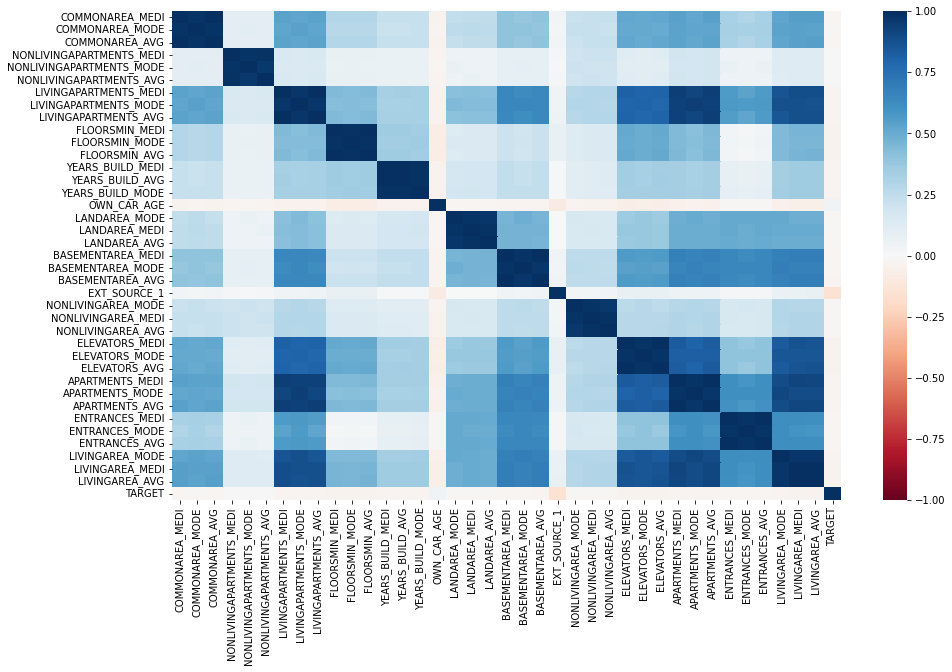

In [7]:
# Correlations between these columns and the target column
corr_columns = percentage50_df['column_name'].tolist()
corr_columns.append("TARGET")
corr_matrix = application_df[corr_columns].corr()

# Visualize corr matrix only with target column
ax = plt.subplots(figsize = (15, 9))
ax = sns.heatmap(corr_matrix, cmap = 'RdBu', center = 0.00, vmin = -1.00, vmax = 1.00)

As we can see from the correlation heatmap displayed above, none of these variables have a considerable correlation with the TARGET variable, suggesting that it would be valid for us to drop them from our dataset.

In [8]:
# Displaying difference in number of columns after preliminary cleaning
application_cleaned_df = application_df.drop(percentage50_df['column_name'].tolist(), axis = 1)
print('We have reduced the total number of columns from ' + str(application_df.shape[1]) + ' to ' +
      str(application_cleaned_df.shape[1]))

We have reduced the total number of columns from 122 to 81


Now, we want to look at the FLAG_DOCUMENT columns in our datasets. These columns have values of 1 if the client provide that document, and 0 if the client did not provide that particular document. However, there is no additional information regarding the type of documents involved. Therefore, we want to look into these columns and check if they are essential to the scope of our project in any way. 

In [9]:
columns = application_cleaned_df.columns.tolist() # converting to list

# lists to append to
to_remove_documents = []
yes_list = []
total_list = []
total_sum = 0

# iterate through columns of dataframe and add all flag_documents to be dropped
for column in columns:
  if column[0:13] == 'FLAG_DOCUMENT':
    to_remove_documents.append(column)

temp_graphing = to_remove_documents.copy()

# iterates through and adds to yes_list and total_sum
for column in temp_graphing:
  total_agg = application_cleaned_df.groupby([column,'TARGET']).size()
  if(column == "FLAG_DOCUMENT_4" or column == "FLAG_DOCUMENT_10" or column == "FLAG_DOCUMENT_12"):
    total = total_agg[1][0]
    total_list.append(total)
    total_sum += total
    yes_list.append(0)
  else:
    total = total_agg[1][1] + total_agg[1][0]
    perc_yes_1 = (total_agg[1][1]/(total_agg[1][0] + total_agg[1][1])) * 100
    total_list.append(total)
    yes_list.append(perc_yes_1)
    total_sum += total

# processing for dataframe
total_percent = (total_list/total_sum)*100
temp_graphing = [temp[14:] for temp in temp_graphing]
frame = {'Labels': temp_graphing,'Rate': yes_list, 'Total': total_list, '% Share': total_percent}

# displaying findings
df_documents = pd.DataFrame(frame)
df_documents = df_documents.sort_values(by = "Total")
display(df_documents)

,Labels,Rate,Total,% Share
10,12,0.000000,2,0.000879
8,10,0.000000,6,0.002637
0,2,44.444444,9,0.003955
2,4,0.000000,21,0.009228
5,7,5.660377,53,0.023290
15,17,3.278689,61,0.026805
19,21,13.253012,83,0.036472
18,20,7.627119,118,0.051852
17,19,7.092199,141,0.061959
13,15,3.103448,290,0.127434


Following this, we decided to display the distribution of FLAG_DOCUMENTs and their respective Target = 1 rates. 

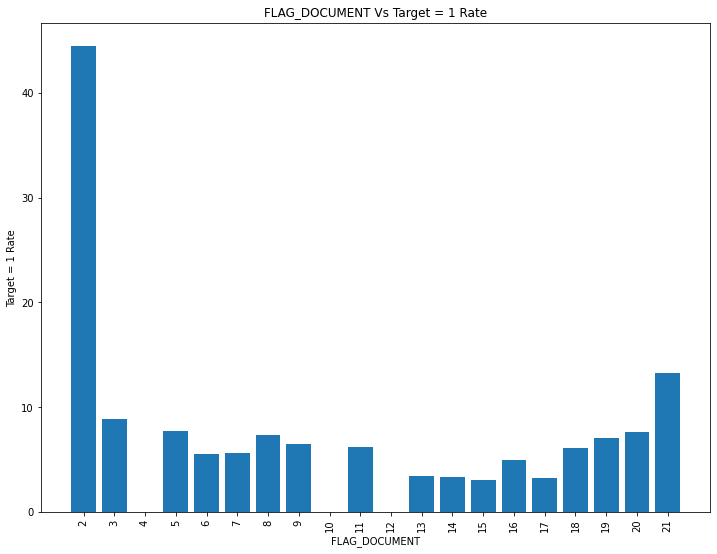

In [10]:
# plotting
plt.figure(figsize = (12, 9))
plt.bar(temp_graphing, yes_list)
plt.title('FLAG_DOCUMENT Vs Target = 1 Rate')
plt.xlabel('FLAG_DOCUMENT')
plt.xticks(rotation = 90)
plt.ylabel('Target = 1 Rate')
plt.show()

The bar plot above demonstrates that the target rate varies for each flag document. However, the percentage values plotted are largely skewed given the uneven presence of each flag document type in the data chosen. For example, flag document 2 forms only 0.0006% of the total data whereas flag document 3 comprises of nearly 76% of the data. Our lack of understanding of the column along with the explained uncertainty justified the removal of the column.


In [11]:
# dropping columns
num_columns = application_cleaned_df.shape[1]
application_cleaned_df = application_cleaned_df.drop(columns = to_remove_documents)
application_cleaned_df = application_cleaned_df.drop(columns = 'SK_ID_CURR')
print('We have further reduced the total number of columns from ' + str(num_columns) + ' to ' +
      str(application_cleaned_df.shape[1]))

We have further reduced the total number of columns from 81 to 60


## Additional Data Cleaning
We would like to look at some additional columns, and potentially drop the columns that are irrelevent in our case. Again, we will compute the percentage of missing values in each of the remaining columns. 

In [12]:
percentagelist = (application_cleaned_df.isnull().sum() / application_cleaned_df.shape[0] * 100.00).tolist()
columnlist = (application_cleaned_df.columns).tolist()

percentagetuplelist = []

# add a tuple of column name and its percentage of null values to percentagetuplelist
for p in range(len(percentagelist)):
  percentagetuplelist.append((columnlist[p], percentagelist[p]))

percentages_df = (pd.DataFrame(percentagetuplelist, columns = ["column_name", "percentage_null"])).sort_values(by = 'percentage_null', ascending = False)

# Now we want to merge these column names with their description
percentages_df = pd.merge(percentages_df, columns_df, how = 'inner', 
                           left_on = 'column_name', right_on = 'Row', copy = False)
percentages_df = percentages_df[['column_name', 'Description', 'percentage_null']]

percentages_df.head(10)

,column_name,Description,percentage_null
0,FLOORSMAX_MEDI,Normalized information about building where th...,49.838344
1,FLOORSMAX_AVG,Normalized information about building where th...,49.837935
2,FLOORSMAX_MODE,Normalized information about building where th...,49.837935
3,YEARS_BEGINEXPLUATATION_MEDI,Normalized information about building where th...,48.845926
4,YEARS_BEGINEXPLUATATION_AVG,Normalized information about building where th...,48.845517
5,YEARS_BEGINEXPLUATATION_MODE,Normalized information about building where th...,48.845517
6,TOTALAREA_MODE,Normalized information about building where th...,48.337864
7,EMERGENCYSTATE_MODE,Normalized information about building where th...,47.462345
8,OCCUPATION_TYPE,What kind of occupation does the client have,31.369071
9,EXT_SOURCE_3,Normalized score from external data source,19.864707


While features with percentage_null as high as 47% should be dropped, we were uncertain whether one with 31% should be dropped as well. This is why we decided to plot the feature under consideration, occupation_type, against the rate at which the target variable = 1.

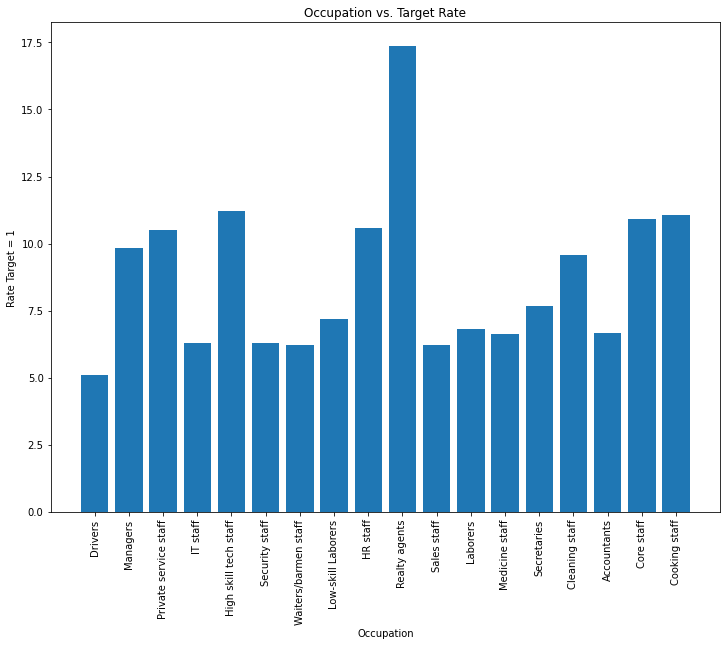

In [13]:
# creating aggregate occupation dataframe to show all occupation types
# we will use this in our EDA below
agg_occupation = application_cleaned_df.groupby(["OCCUPATION_TYPE","TARGET"]).size()
agg_occupation_df = agg_occupation.to_frame().reset_index()
agg_occupation_df = agg_occupation_df.rename(columns = {0: 'Total'})

yes_rate = []
occupation = list(set(agg_occupation_df["OCCUPATION_TYPE"].to_list()))

for i in range(0, len(agg_occupation), 2):
  total = agg_occupation[i] + agg_occupation[i + 1]
  amount = agg_occupation[i + 1]
  percentage = (amount/total) * 100
  yes_rate.append(percentage)

# makes plot
plt.figure(figsize = (12, 9))
plt.bar(occupation, yes_rate)
plt.xticks(rotation = 90)
plt.xlabel("Occupation")
plt.ylabel("Rate Target = 1")
plt.title("Occupation vs. Target Rate")
plt.show()

From the bar plot above we see that the target = 1 rate varies largely across different occupation types justfying that it should remain in the data set, despite its relatively high percentage null value.

In [14]:
# drops columns: All columns that have high percentage null except occupation type
to_drop_null = percentages_df.head(n=8)["column_name"].tolist()
application_cleaned_df_rdoc_rnull = application_cleaned_df.drop(columns = to_drop_null)

# drops null values
application_model_df = application_cleaned_df_rdoc_rnull.dropna()

Now, we will look into the FLAG columns to see if their presence in the dataset is essential as opposed to the FLAG_DOCUMENT columns we previously dropped. 

In [15]:
columns = application_model_df.columns.tolist()
flag_columns_Y = []
flag_columns_1 = []
no_list = []
yes_list = []

for column in columns:
  if column[0:4] == 'FLAG':
    if(application_model_df[column][0] == "N" or 
       application_model_df[column][0] == "Y"):
      flag_columns_Y.append(column)
    else:
      flag_columns_1.append(column)

flag_columns_1.remove("FLAG_MOBIL")

for column in flag_columns_Y: 
  total_agg = application_model_df.groupby([column,'TARGET']).size()
  perc_no_1 = total_agg[1]/(total_agg[0] + total_agg[1])
  perc_yes_1 = total_agg[3]/(total_agg[2] + total_agg[3])
  no_list.append(perc_no_1)
  yes_list.append(perc_yes_1)

for column in flag_columns_1:
  total_agg = application_model_df.groupby([column,'TARGET']).size()
  perc_no_1 = total_agg[0][1]/(total_agg[0][0] + total_agg[0][1])
  perc_yes_1 = total_agg[1][1]/(total_agg[1][0] + total_agg[1][1])
  no_list.append(perc_no_1)
  yes_list.append(perc_yes_1)

flag_columns = flag_columns_Y + flag_columns_1

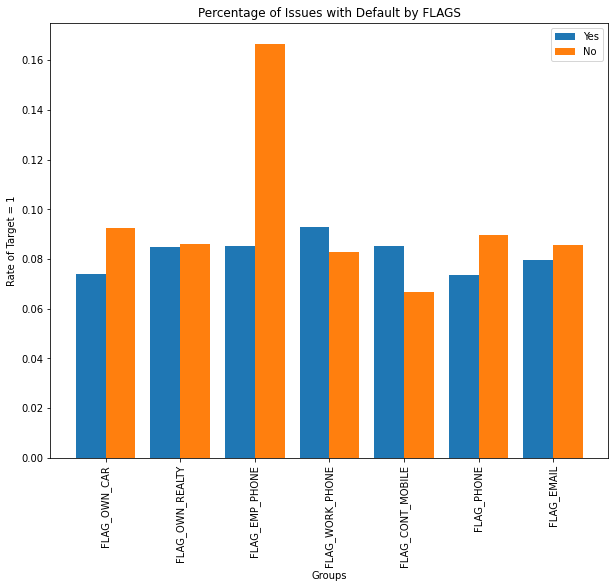

In [16]:
#Citation: https://www.geeksforgeeks.org/plotting-multiple-bar-charts-using-matplotlib-in-python/
#Owns Car, Owns Real Estate, Provided Information
X_axis = np.arange(len(flag_columns))

plt.subplots(figsize = (10, 8))  
plt.bar(X_axis - 0.2, yes_list, 0.4, label = 'Yes')
plt.bar(X_axis + 0.2, no_list, 0.4, label = 'No')

plt.xticks(X_axis, flag_columns)
plt.xticks(rotation = 90)
plt.xlabel("Groups")
plt.ylabel("Rate of Target = 1")
plt.title("Percentage of Issues with Default by FLAGS")
plt.legend()
plt.show()

The bar plot above supports our exploration of the FLAG variables that indicate Yes and No for areas including whether a loan reciever owns a car, has provided a phone number, and so forth. Our observations were that the differences in rate of target = 1 was sufficient for the features to be explored in the modeling stage.

## Distribution Visualizations
Now that we have dropped some of the columns, we want to better understand the data by plotting the distributions of some of the variables in our dataset. These variable denote the gender of the applicants, the number of applicants that faced payment difficulties, the contract type of the loan, and so on. The remaining variables are outlined below. 

In [17]:
# function to store values, with specific column from dataframe and rows to drop (ill-formatted)

def create_plot_type(column, drops):
  agg_column = application_cleaned_df.groupby([column,"TARGET"]).size()
  agg_column_df = agg_column.to_frame().reset_index()
  agg_column_df = agg_column_df.rename(columns = {0: 'Total'})
  agg_column_df = agg_column_df.drop(labels = drops, axis = 0)

  # list manipulation
  yes_rate = []
  occupation = list(set(agg_column_df[column].to_list()))
  lists = agg_column.to_list()
  for drop in drops:
    del lists[drop]
  agg_column = lists

  # iterates through and appens to list
  for i in range(0, len(agg_column), 2):
    total = agg_column[i] + agg_column[i + 1]
    amount = agg_column[i + 1]
    percentage = (amount/total) * 100
    yes_rate.append(percentage)

  return (occupation, yes_rate)

# saving values in list for plot
x1, y1 = create_plot_type("NAME_TYPE_SUITE", [])
x2, y2 = create_plot_type("NAME_HOUSING_TYPE", [])
x3, y3 = create_plot_type("NAME_EDUCATION_TYPE", [])
x4, y4 = create_plot_type("OCCUPATION_TYPE", [])
x5, y5 = create_plot_type("WEEKDAY_APPR_PROCESS_START", [])
x6, y6 = create_plot_type("ORGANIZATION_TYPE", [])
x7, y7 = create_plot_type("NAME_INCOME_TYPE", [0,9])
x8, y8 = create_plot_type("NAME_FAMILY_STATUS", [8])

Below, we will create plots for each of the 8 categorical variables and compare each with the Target Rate = 1 values. This will help with our analysis below on deciding which categorical variables to drop to improve our model.

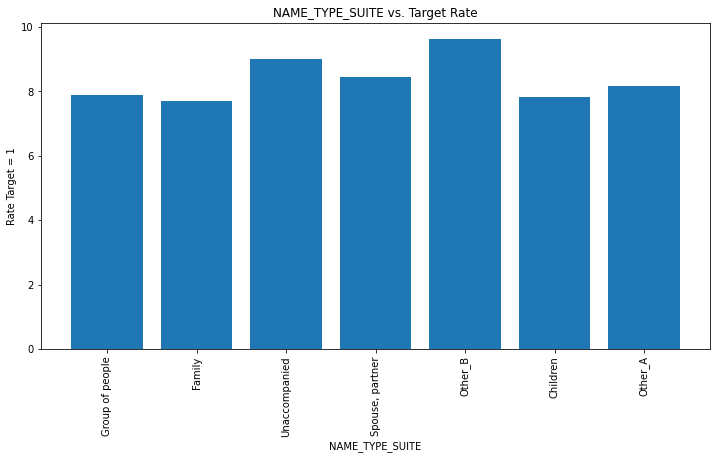

In [18]:
plt.subplots(figsize = (12, 6))
plt.bar(x1, y1)
plt.xticks(rotation = 90)
plt.xlabel("NAME_TYPE_SUITE")
plt.ylabel("Rate Target = 1")
plt.title("NAME_TYPE_SUITE vs. Target Rate")
plt.show()

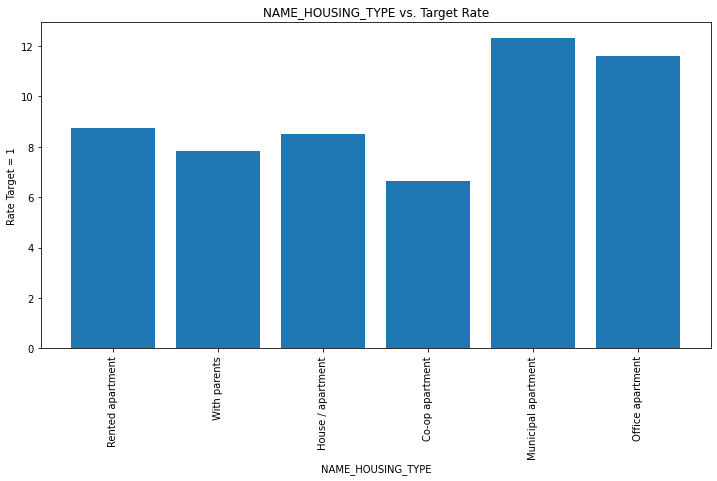

In [19]:
plt.subplots(figsize = (12, 6))
plt.bar(x2, y2)
plt.xticks(rotation = 90)
plt.xlabel("NAME_HOUSING_TYPE")
plt.ylabel("Rate Target = 1")
plt.title("NAME_HOUSING_TYPE vs. Target Rate")
plt.show()

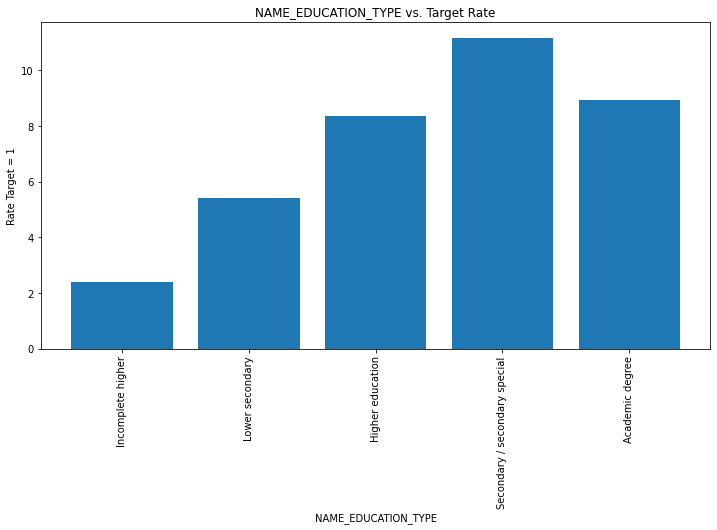

In [20]:
plt.subplots(figsize = (12, 6))
plt.bar(x3, y3)
plt.xticks(rotation = 90)
plt.xlabel("NAME_EDUCATION_TYPE")
plt.ylabel("Rate Target = 1")
plt.title("NAME_EDUCATION_TYPE vs. Target Rate")
plt.show()

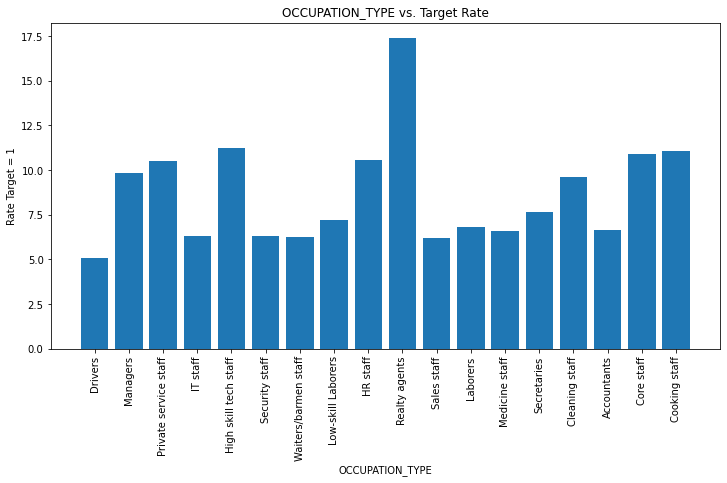

In [21]:
plt.subplots(figsize = (12, 6))
plt.bar(x4, y4)
plt.xticks(rotation = 90)
plt.xlabel("OCCUPATION_TYPE")
plt.ylabel("Rate Target = 1")
plt.title("OCCUPATION_TYPE vs. Target Rate")
plt.show()

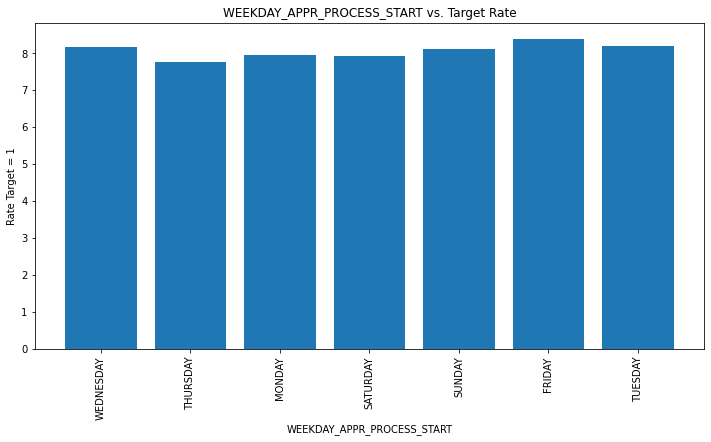

In [22]:
plt.subplots(figsize = (12, 6))
plt.bar(x5, y5)
plt.xticks(rotation = 90)
plt.xlabel("WEEKDAY_APPR_PROCESS_START")
plt.ylabel("Rate Target = 1")
plt.title("WEEKDAY_APPR_PROCESS_START vs. Target Rate")
plt.show()

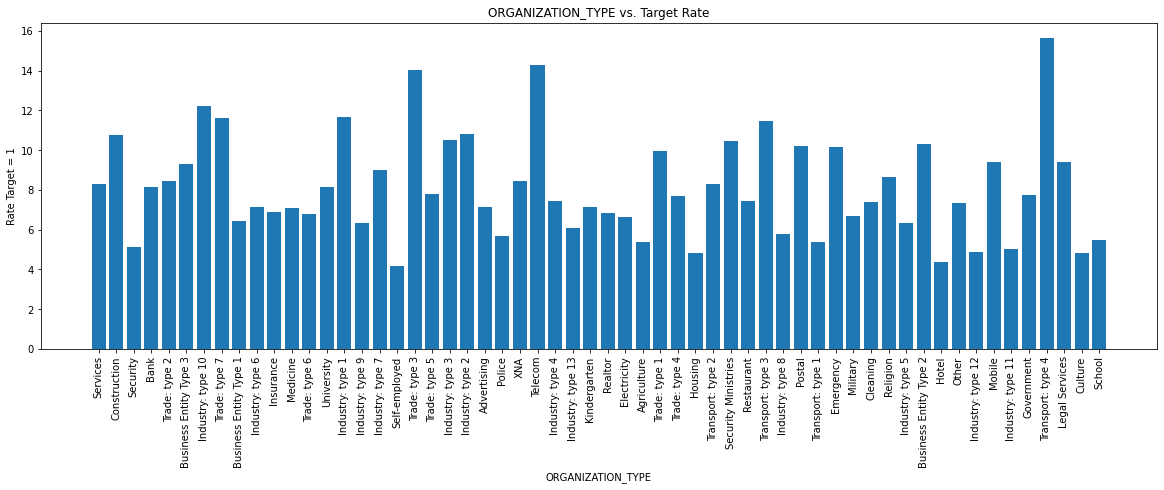

In [23]:
plt.subplots(figsize = (20, 6))
plt.bar(x6, y6)
plt.xticks(rotation = 90)
plt.xlabel("ORGANIZATION_TYPE")
plt.ylabel("Rate Target = 1")
plt.title("ORGANIZATION_TYPE vs. Target Rate")
plt.show()

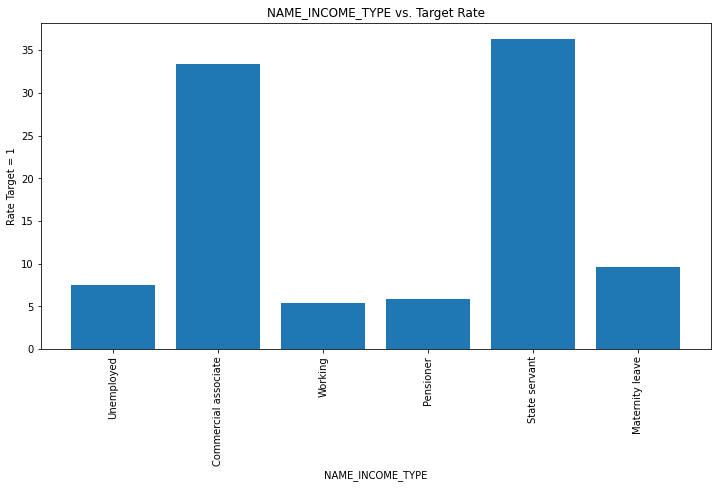

In [24]:
plt.subplots(figsize = (12, 6))
plt.bar(x7, y7)
plt.xticks(rotation = 90)
plt.xlabel("NAME_INCOME_TYPE")
plt.ylabel("Rate Target = 1")
plt.title("NAME_INCOME_TYPE vs. Target Rate")
plt.show()

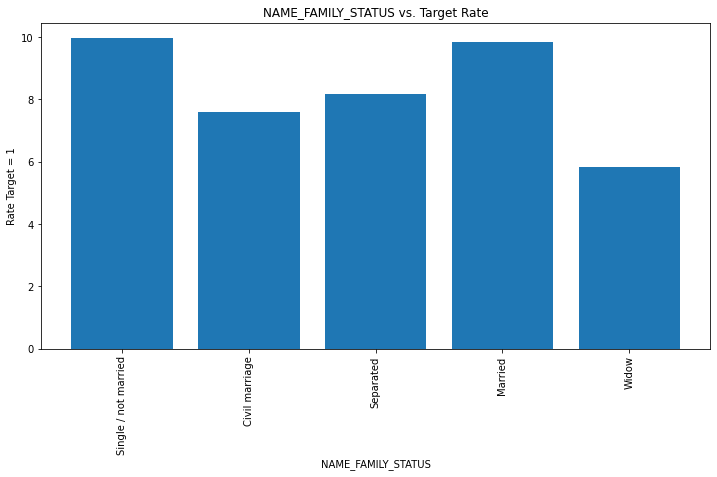

In [25]:
plt.subplots(figsize = (12, 6))
plt.bar(x8, y8)
plt.xticks(rotation = 90)
plt.xlabel("NAME_FAMILY_STATUS")
plt.ylabel("Rate Target = 1")
plt.title("NAME_FAMILY_STATUS vs. Target Rate")
plt.show()

The bar charts above signify that **OCCUPATION_TYPE, WEEKDAY_APPR_PROCESS_START, ORGANIZATION_TYPE, EXT_SOURCE_2** are categorical variables that we should consider dropping. Weekdays, have Target Rate = 1 values that are almost identical, implying they are insignificant. The other 3 were dropped to address overfitting. 

In [26]:
# drops some columns from above - too many values so reduces overfitting, or they simply make no difference
application_model_df_dropped = application_model_df.drop(columns = ["OCCUPATION_TYPE", "WEEKDAY_APPR_PROCESS_START", "ORGANIZATION_TYPE", "EXT_SOURCE_2"])

Let's look at the distribution of some other variables. 

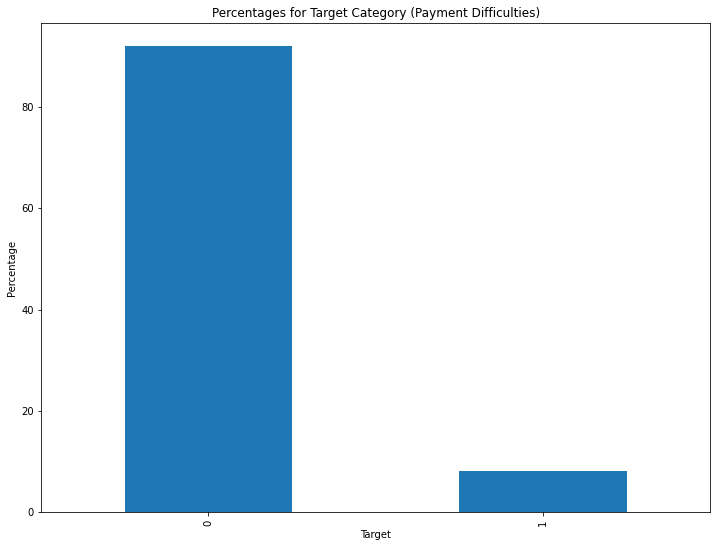

In [27]:
# makes plot 
plt.figure(figsize = (12, 9))
target_perc = (application_cleaned_df.groupby('TARGET').size() / 
               application_cleaned_df.groupby('TARGET').size().sum()) * 100
ax = target_perc.plot(kind='bar')
plt.title('Percentages for Target Category (Payment Difficulties)')
plt.xlabel('Target')
plt.ylabel('Percentage')
plt.show()

As we can see by the plot shown above, the vast majority of the clients in the dataset have not faced any payment difficulties as given by the 0 value of the TARGET variable. Only a small portion (~15% of the clients) have faced payment difficulties as given by the 1 value of the TARGET variable. These results clearly show a considerable imbalance in our data which is skewed more towards clients not having payment difficulties; this imbalance needs to be addressed in our modeling in order to account for any possible misinterpretations. 

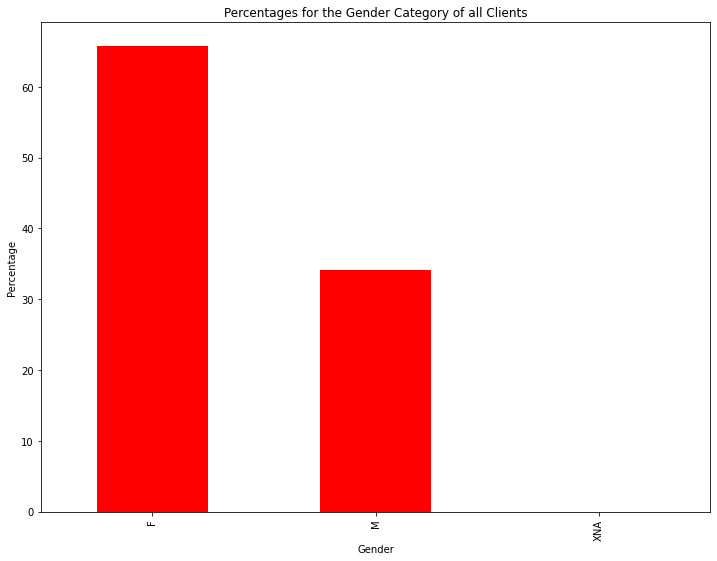

In [28]:
#Visualize the percentage of each category to gain more insight 
#into the demographics of the applicants
plt.figure(figsize = (12, 9))
gender_perc = (application_cleaned_df.groupby('CODE_GENDER').size() / 
               application_cleaned_df.groupby('CODE_GENDER').size().sum()) * 100
ax = gender_perc.plot(kind='bar', color = 'red')
plt.title('Percentages for the Gender Category of all Clients')
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.show()

As we can see by the plot shown above, ~65% of the clients are female and ~35% of the clients are male. There is a tiny portion of clients that have chose not to identify their gender, labeled as XNA. 

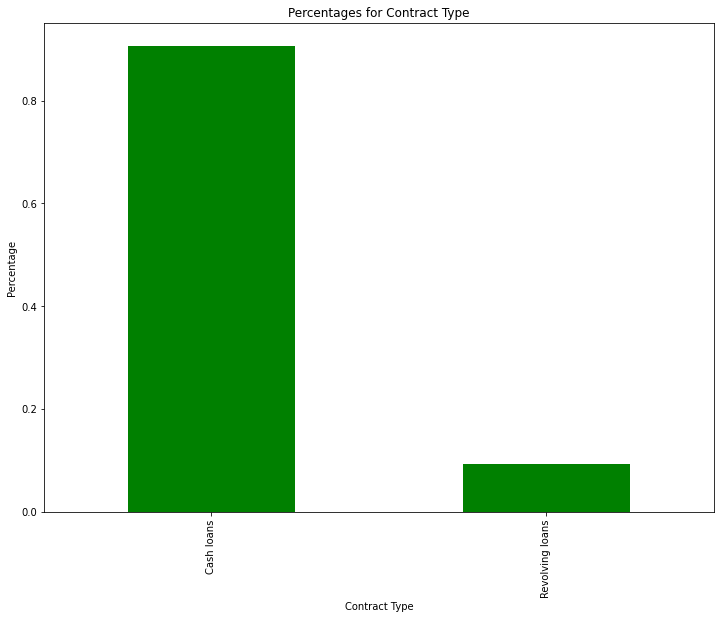

In [29]:
# makes plot
plt.figure(figsize = (12, 9))
contract_perc = (application_cleaned_df.groupby('NAME_CONTRACT_TYPE').size() / 
                 application_cleaned_df.groupby('NAME_CONTRACT_TYPE').size().sum())
ax = contract_perc.plot(kind='bar', color = 'g')
plt.title('Percentages for Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Percentage')
plt.show()

As we can see by the plot shown above, the vast majority of the clients are have requested cash loans, and the remaining clients have requesting revolving loans. 

### Income and AMT Credit Distributions
Now, we would like to take a look at the distributions of the Income and AMT Credit variables for the clients present in our dataset to see if there are any commonalities across the dataset. We chose to divide the Income and AMT Credit values into 'bins' that represent the bracket ranges (differing by $100k each). This allows us to gain a better understanding of which 'brackets' have the majority of clients.

In [30]:
# Understand the distribution of income for applicants
application_cleaned_df_dist = application_cleaned_df.copy()
application_cleaned_df_dist['AMT_INCOME_RANGES'] = application_cleaned_df_dist['AMT_INCOME_TOTAL'] / 100000

# We want to categorize the incomes into these ranges present
range_numbers = [0,1,2,3,4,5,6,7,8,9,10,11]
range_labels = ['0-100K','100K-200K', '200k-300k','300k-400k','400k-500k','500k-600k','600k-700k','700k-800k','800k-900k','900k-1M', '1M Above']

# Shows distribution of income as percentage of all incomes included in the dataframe
application_cleaned_df_dist['AMT_INCOME_RANGES'] = pd.cut(application_cleaned_df_dist['AMT_INCOME_RANGES'], range_numbers, labels = range_labels)
income_ranges = application_cleaned_df_dist.groupby(['AMT_INCOME_RANGES']).count() / application_cleaned_df_dist.groupby(['AMT_INCOME_RANGES']).count().sum() * 100
income_ranges = income_ranges.reset_index()
application_cleaned_df_dist['AMT_INCOME_RANGES'].value_counts() / application_cleaned_df_dist['AMT_INCOME_RANGES'].value_counts().sum() * 100

100K-200K    50.722373
200k-300k    21.196701
0-100K       20.755751
300k-400k     4.782961
400k-500k     1.742940
500k-600k     0.348915
600k-700k     0.283468
800k-900k     0.099398
700k-800k     0.053994
900k-1M       0.008181
1M Above      0.005318
Name: AMT_INCOME_RANGES, dtype: float64

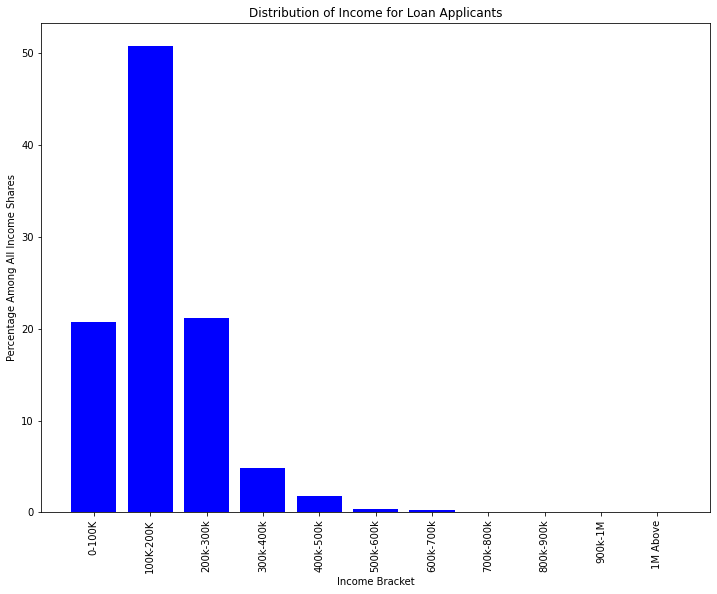

In [31]:
# Graphing the ranges
plt.figure(figsize=(12, 9))
plt.bar(income_ranges['AMT_INCOME_RANGES'], income_ranges['TARGET'], color = 'b')
plt.xticks(rotation = 90)
plt.xlabel("Income Bracket")
plt.ylabel("Percentage Among All Income Shares")
plt.title("Distribution of Income for Loan Applicants")
plt.show()

As we can see from the plot shown above, more than 50% of loan applicants have incomes in the range of 100K-200K, constituting the vast majority across all other income brackets. Note that almost 92% of loan applicants have income less than 300K, which is consistent with the logical correlation that people with higher incomes are less likely to take out loans. 

In [32]:
# Understand the distrubution of AMT Credit for applicants
application_cleaned_df_dist['AMT_CREDIT_RANGES'] = application_cleaned_df_dist['AMT_CREDIT'] / 100000

# We want to categorize the incomes into these ranges present
range_numbers = [0,1,2,3,4,5,6,7,8,9,10,100]
range_labels = ['0-100K','100K-200K', '200k-300k','300k-400k','400k-500k','500k-600k','600k-700k','700k-800k','800k-900k','900k-1M', '1M Above']

# Shows distribution of credit brackets as percentage of all credit brackets included in the dataframe
application_cleaned_df_dist['AMT_CREDIT_RANGES'] = pd.cut(application_cleaned_df_dist['AMT_CREDIT_RANGES'], range_numbers, labels = range_labels)
credit_ranges = application_cleaned_df_dist.groupby(['AMT_CREDIT_RANGES']).count() / application_cleaned_df_dist.groupby(['AMT_CREDIT_RANGES']).count().sum() * 100
credit_ranges = credit_ranges.reset_index()
application_cleaned_df_dist['AMT_CREDIT_RANGES'].value_counts() / application_cleaned_df_dist['AMT_CREDIT_RANGES'].value_counts().sum() * 100

200k-300k    17.855756
1M Above     16.244099
500k-600k    11.093581
400k-500k    10.435102
100K-200K     9.794609
300k-400k     8.593325
600k-700k     7.783614
800k-900k     7.103472
700k-800k     6.221005
900k-1M       2.913899
0-100K        1.961538
Name: AMT_CREDIT_RANGES, dtype: float64

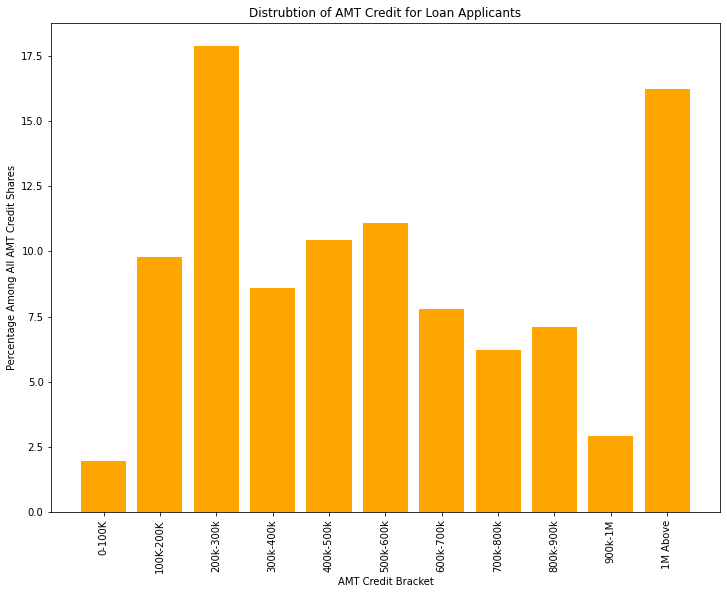

In [33]:
# Graphing the ranges
plt.figure(figsize=(12, 9))
plt.bar(credit_ranges['AMT_CREDIT_RANGES'], credit_ranges['TARGET'], color = 'orange')
plt.xticks(rotation = 90)
plt.xlabel("AMT Credit Bracket")
plt.ylabel("Percentage Among All AMT Credit Shares")
plt.title("Distrubtion of AMT Credit for Loan Applicants")
plt.show()

There seems to be a decent variation in terms of the distribution of the amount of loan requested by clients; however, about 16% of loan applicants have taken out a loan which amounts to more than 1M, which was quite surprising to us! Let's look into that for a moment.

In [34]:
# distribution of payment difficulties within >1M class
one_mil_loans = application_cleaned_df_dist[application_cleaned_df_dist['AMT_CREDIT_RANGES'] == '1M Above']
one_mil_loans_perc = (one_mil_loans.groupby(['TARGET']).size() / one_mil_loans.groupby(['TARGET']).size().sum()) * 100
one_mil_loans_perc

TARGET
0    94.099441
1     5.900559
dtype: float64

Among the applicants who have taken out a loan which amounts to more than 1M, the vast majority (~ 94%) have not had any payment difficulties, whereas only a tiny portion (~ 6%) have had some sort of difficulties in paying back the loan. Financial institutions that gives out a loan for an amount that exceeds 1M have definitely factored in other attributes of the applicant that gave them some level of security in having the loan paid back. That is, for a bank to give out a loan of such amount, it must have accounted for some other attributes that would push them to minimize the risk of such loan. These results motivate the need to do further modeling in order to identify these underlying attributes that affect loan approvals, which serves as a gateway to our modeling phase!

# Hypothesis given EDA

Following our EDA and the included bar plots we made the following overlying observations:

1.   We see large variability within the target = 1 rate for different **education types** indicating that it could **potentially be a large contributor** in the classification process. Intuitively, this makes sense as higher education enables more financial stability and responsibility.
2.   We see large variability within the target = 1 rate for different **income types** indicating that it could **potentially be a large contributor** in the classification process. Intuitively, this makes sense as different sources of income result in varying funding and allocation of finances.
3.   While we decided to keep **flag** variables such as FLAG_MOBILE and FLAG_CAR given the differences we saw within EDA, we believe that they **shouldn't be a large** contributing factor given that it is hard to intuitively connect them with loan payments based on our preliminary knowledge of loan approvals. 

# Feature Engineering
We will now extract features from our raw data via data mining techniques in order to improve the performance of our following algorithms. Given that we are dealing with some categorical variables, we need to do some **one-hot encoding** in order to be able to use these variables in algorithms that deal with numerical variables. The following code blocks identify the categorical variables in our dataset, and turn them into their binary representations for each respective category using one-hot encoding.

In [35]:
# function to help with hot encoding
def hotencode_df(df):
  df_hotencode = df
  columns = df_hotencode.columns.to_list()
  df = df_hotencode.dtypes
  df = df.reset_index().rename(columns={0: 'type'})

  # keeps track of object types
  obj_list = []
  for index, row in df.iterrows():
      if (row['type'] == object):
        obj_list.append(row['index'])
  
  # makes yes = 1 and no = 0
  for obj in obj_list: 
    if((set(df_hotencode[obj].to_list())) == set(["N","Y"])):
      df_hotencode[obj] = df_hotencode[obj].replace(['Y'],1)
      df_hotencode[obj] = df_hotencode[obj].replace(['N'],0)
      obj_list.remove(obj)
    if((set(df_hotencode[obj].to_list())) == set(["1","0"])):
      df_hotencode[obj] = df_hotencode[obj].replace(['1'],1)
      df_hotencode[obj] = df_hotencode[obj].replace(['0'],0)
      obj_list.remove(obj)

  # for loop to perform hot encoding
  for col in obj_list:
    #creating instance of one-hot-encoder
    encoder = OneHotEncoder()
    #perform one-hot encoding on 'team' column 
    encoder_df = pd.DataFrame(encoder.fit_transform(df_hotencode[[col]]).toarray())
    values = list(set(df_hotencode[col].to_list()))
    frame = {}
    for i, value in enumerate(values):
      frame[i] = col + " " + value
    encoder_df = encoder_df.rename(frame, axis = 1)
    for enc_col in encoder_df.columns.to_list():
       df_hotencode[enc_col] = encoder_df[enc_col].to_list()
    #merge one-hot encoded columns back with original DataFrame
    df_hotencode = df_hotencode.drop(columns = col)
  
  return df_hotencode # returns hot encoded dataframe

In [36]:
# gets features and labels of a dataframe
def feature_label(df):
  features = df.drop(columns = "TARGET") # drops TARGET variable
  labels = df['TARGET']
  labels = labels.astype(int)
  return features, labels

In [37]:
model_df = application_model_df_dropped.copy()

# Test-Train Split
We will do a test-train split such that 80% of the data is used to train our models, whereas 20% of the data is used to test our models. Note that we use our TARGET variable, which represents having payment difficulties, as our label, and the remaining variables as the features. 

In [38]:
# hot encodes dataframe and finds feature and labels
df_hotencode = hotencode_df(model_df)
features, labels = feature_label(df_hotencode)

# test-train split
x_train, x_test, y_train, y_test = train_test_split(features, labels, random_state = 42, test_size = 0.2)

# SMOTE

As we have noted earlier, our data is substantially imbalanced with regards to the TARGET variable. The challenge of working with imbalanced datasets is that most machine learning techniques will ignore, and in turn have poor performance on, the minority class, although typically it is performance on the minority class that is most important. Therefore, we will use **Synthetic Minority Oversampling Technique (SMOTE)** in order to balance the data by adding duplicating examples in the minority class that don’t necessarily add any new information to the model. 

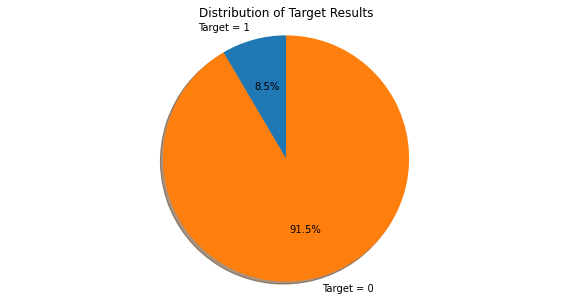

In [39]:
# Pie chart to display inequal distribution before smoting
labels = 'Target = 1', 'Target = 0'
sizes = [sum(y_train == 1), sum(y_train == 0)]

fig1, ax1 = plt.subplots(figsize = (10, 5))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Distribution of Target Results")
plt.show() # show pie chart

As shown above, our dataset is heavily imbalanced. So, we perform SMOTE below.

In [40]:
# shows counts before
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

# smotes data
sm = SMOTE()
x_train_smote, y_train_smote = sm.fit_resample(x_train, y_train)

# shows shape
print('After OverSampling, the shape of train_X: {}'.format(x_train_smote.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_smote.shape))
  
# shows counts after
print("After OverSampling, counts of label '1': {}".format(sum(y_train_smote == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_smote == 0)))

Before OverSampling, counts of label '1': 9039
Before OverSampling, counts of label '0': 97641 

After OverSampling, the shape of train_X: (195282, 75)
After OverSampling, the shape of train_y: (195282,) 

After OverSampling, counts of label '1': 97641
After OverSampling, counts of label '0': 97641


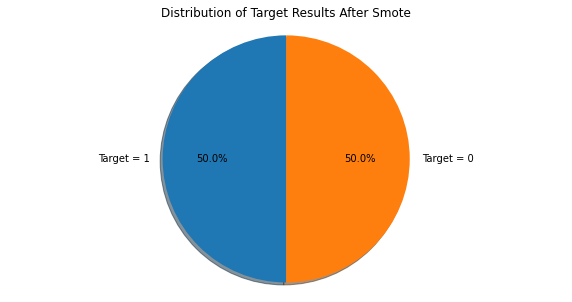

In [41]:
# Pie chart to display better distribution after smoting
labels = 'Target = 1', 'Target = 0'
sizes = [sum(y_train_smote == 1), sum(y_train_smote == 0)]

fig1, ax1 = plt.subplots(figsize = (10, 5))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 
plt.title("Distribution of Target Results After Smote")
plt.show() # show pie chart

# Modeling


In this section, models are created to predict the target variable. The baseline model is built using decision trees. We then take an alternative approach within supervised learning to explore logistical regression models. Findings in this section include the value of taking a trees approach for this dataset and approaches to bagging that help improve scores.

For each model, we look into the training accuracy, testing accuracy, and the AUC of the ROC plot. Measuring training and testing accuracy helps recognize any underfitting or overfitting. In particular, the AUC score of the ROC curve will be used to assess whether the model is being "improved" and direct the following model development.

## Decision Trees

### Baseline Model: Initial Model

We know that the baseline model can't only predict the majority class because of the imbalance present in our data. While smoting balances the training set, it makes no impact on our testing data.

This is why we decided to create a decision tree only using categorical variables as our baseline model. This was specifically given because of the large presence of features as a result of one hot encoding.

In [42]:
# hot encodes dataframe
hotencode_model_df = hotencode_df(model_df)
columns = hotencode_model_df.columns.to_list()

# finds values of 0 or 1 only
obj_list = []
for column in columns: 
  if(set(hotencode_model_df[column].to_list()) == {0,1}):
    obj_list.append(column)

model_category_df = hotencode_model_df[obj_list]

# re-smote
features, labels = feature_label(model_category_df)
x_train, x_test, y_train, y_test = train_test_split(features, labels, random_state = 42, test_size = 0.2)
sm = SMOTE()
x_train_smote, y_train_smote = sm.fit_resample(x_train, y_train)

In [43]:
# creates decision tree classifier
clf = DecisionTreeClassifier()
clf = clf.fit(x_train_smote, y_train_smote)

# sets variable values to predictions, accuracies, and scores
y_pred1 = clf.predict(x_test)
y_pred11 = clf.predict_proba(x_test)[:, 1]
train_accuracy1 = accuracy_score(y_train_smote, clf.predict(x_train_smote))
test_accuracy1 = accuracy_score(y_test, y_pred1)
roc1 = roc_auc_score(y_test, clf.predict_proba(x_test)[: , 1])

# prints metrics
print("Training Accuracy: " + str(train_accuracy1))
print("Testing Accuracy: " + str(test_accuracy1)) 
print("ROC Score: " + str(roc1))

fpr1, tpr1, _ = metrics.roc_curve(y_test, clf.predict_proba(x_test)[:,1]) # used for line chart

Training Accuracy: 0.7229186509765365
Testing Accuracy: 0.6183352080989877
ROC Score: 0.5409691287487596


From the scores above, we observed that both our testing and training accuracies were relatively low, indicating underfitting. This will be adressed by increasing the complexity of the model and including a greater number of features. More specifically, while the baseline model included only categorical variables, we will now also include the continuous variables.

### Baseline Model: Improvement by finding optimal max_depth

Here, we decided to incrementally change the model's max_depth in order to find the optimal depth that would maximize our testing accuracy.

In [44]:
# re-smote
features, labels = feature_label(hotencode_df(model_df))
x_train, x_test, y_train, y_test = train_test_split(features, labels, random_state = 42, test_size = 0.2)
sm = SMOTE()
x_train_smote, y_train_smote = sm.fit_resample(x_train, y_train)

In [45]:
# stores lists of accuracies for plot
training_accuracy = []
testing_accuracy = []
roc_scores = []
depths = []

# iterates through max_depths and stores values in lists above
for i in range(1,60,5):
  clf = DecisionTreeClassifier(random_state = 16, max_depth = i)
  clf = clf.fit(x_train_smote,y_train_smote)
  training_accuracy.append(metrics.accuracy_score(y_train_smote, clf.predict(x_train_smote)))
  testing_accuracy.append(metrics.accuracy_score(y_test, clf.predict(x_test)))
  roc_scores.append(roc_auc_score(y_test, clf.predict_proba(x_test)[: , 1]))
  depths.append(i)

Below, we plot the training and testing accuracies from above.

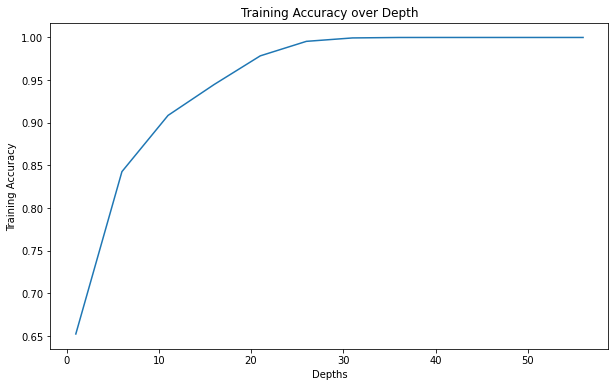

In [46]:
# Make plots
plt.subplots(figsize = (10, 6))
plt.plot(depths, training_accuracy)
plt.xlabel("Depths")
plt.ylabel("Training Accuracy")
plt.title("Training Accuracy over Depth")
plt.show()

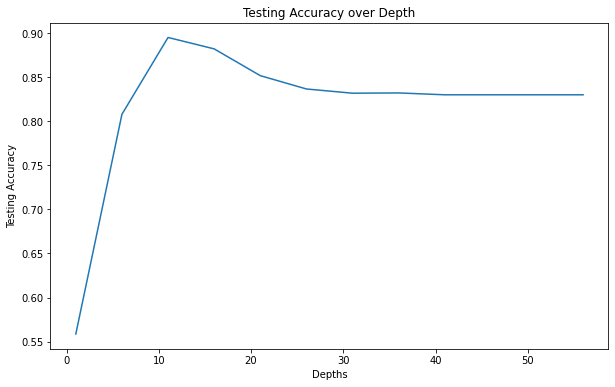

In [47]:
# Make plots
plt.subplots(figsize = (10, 6))
plt.plot(depths, testing_accuracy)
plt.xlabel("Depths")
plt.ylabel("Testing Accuracy")
plt.title("Testing Accuracy over Depth")
plt.show()

The plots above show the change in training and testing accuracy of our data as our max_depth value changes. We use these plots to determine the max_depth value at which the graph plateaus. Below, we find its precise index and use this hyperparameter value in our model.

In [48]:
max_score_index = testing_accuracy.index(max(testing_accuracy)) # index of best max_depth

max_Depth = depths[max_score_index] # finds max max_depth value from lists above

# instantiates decision tree classifier
clf = DecisionTreeClassifier(max_depth = max_Depth)
clf = clf.fit(x_train_smote,y_train_smote)

# sets variable values to predictions, accuracies, and scores
y_pred2 = clf.predict(x_test)
train_accuracy2 = accuracy_score(y_train_smote, clf.predict(x_train_smote))
test_accuracy2 = accuracy_score(y_test, y_pred2)
roc2 = roc_auc_score(y_test, clf.predict_proba(x_test)[: , 1])

# prints metrics
print("Training Accuracy: " + str(train_accuracy2))
print("Testing Accuracy: " + str(test_accuracy2))
print("ROC Score: " + str(roc2))

fpr2, tpr2, _ = metrics.roc_curve(y_test, clf.predict_proba(x_test)[:,1]) # used in line chart at end

Training Accuracy: 0.9086398131932283
Testing Accuracy: 0.8949756280464942
ROC Score: 0.6483767331935311


From the scores listed above, our preliminary tuning through max_depth optimality and the inclusion of a greater number of parameters has improved the model's testing and training accuracies. We also observed that our ROC Score imporved significantly by around ~10% while our precision score remained the same.

Here, we see that an alteration to decision trees greatly impacted our success metrics. Before further proceeding with a trees approach, it would be valuable to compare its effectiveness to other forms of supervised learning; we decided to look into logistic regression.

## Alternate Models

### Modeling PCA Logistic Regression

We began by using PCA Logistic Regression given the simplicity and dimensionality reduction that the model allows.

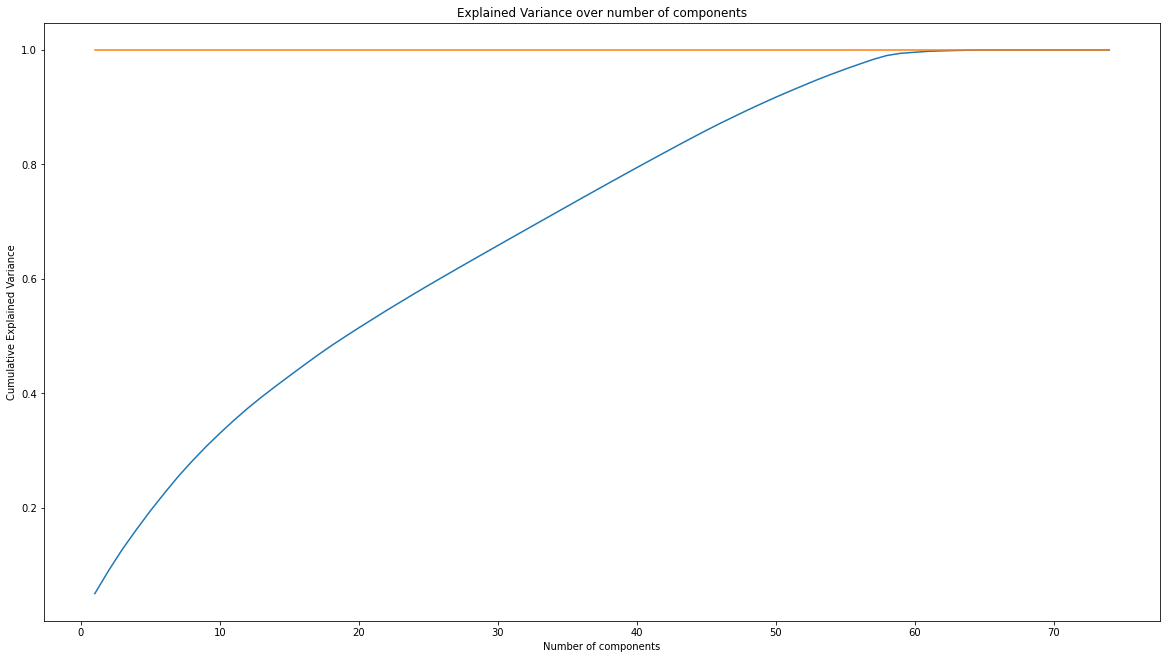

In [49]:
# Scaling with standard scalar for PCA
scaler = preprocessing.StandardScaler() 
x_train_sc = scaler.fit_transform(x_train_smote)
x_test_sc = scaler.transform(x_test)

# Instantiate and Fit PCA
pca = PCA(n_components=len(x_train.columns))
pca_x_train = pca.fit_transform(x_train_sc)
pca_x_test = pca.transform(x_test_sc)

# Saved the explained variance ratios into variable called "explained_variance_ratios"
explained_variance_ratios = pca.explained_variance_ratio_
# Saved the CUMULATIVE explained variance ratios into variable called "cum_evr"
cum_evr = explained_variance_ratios.sum()

plt.subplots(figsize = (20,11))
plt.plot(np.arange(1, len(x_train.columns) + 1), np.cumsum(pca.explained_variance_ratio_))
plt.plot(np.arange(1, len(x_train.columns) + 1), [1.0]*(len(x_train.columns)))
plt.xlabel("Number of components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance over number of components")
plt.show()

Examining the cumulative variance over the number of components helped us visualize the plateau and decide to use 60 components.

In [50]:
#https://towardsdatascience.com/calculating-and-setting-thresholds-to-optimise-logistic-regression-performance-c77e6d112d7e#:~:text=Benchmarking

# Instantiated, fit, predict, and score logistic regression
pca = PCA(n_components=60)

# train and test
pca_x_train = pca.fit_transform(x_train_sc)
pca_x_test = pca.transform(x_test_sc)

# instantiated logistic regression
pca_clf = LogisticRegression()
pca_clf.fit(pca_x_train, y_train_smote)

# sets variable values to predictions, accuracies, and scores
y_pred4 = pca_clf.predict(pca_x_test)
train_accuracy4 = accuracy_score(y_train_smote, pca_clf.predict(pca_x_train))
test_accuracy4 = accuracy_score(y_test, y_pred4)
roc4 = roc_auc_score(y_test, pca_clf.predict_proba(pca_x_test)[: , 1])

# prints metrics
print("Training Accuracy: " + str(train_accuracy4))
print("Testing Accuracy: " + str(test_accuracy4))
print("ROC Score: " + str(roc4))

fpr4, tpr4, _ = metrics.roc_curve(y_test, pca_clf.predict_proba(pca_x_test)[:,1]) # for use in line chart at end

Training Accuracy: 0.7893712682172448
Testing Accuracy: 0.7385451818522685
ROC Score: 0.6251418254690486


We found that all 4 measurements were lower than the measurements found by bagging decision trees. A potential reason could be that the large presence of categorical variables in our data set makes it better aligned to decision trees rather than logistic regression models. 

We know that PCA reduces dimensionality potentially underfitting the data. To look further into this, we decided to pursue non-pca logistic regression.

### Non-PCA Initial Logistic Regression

In [51]:
warnings.filterwarnings('ignore') # used here to surpress small warning - no impact on data

# instantiates logistic regression
clf = LogisticRegression()
clf.fit(x_train_smote, y_train_smote)

# sets variable values to predictions, accuracies, and scores
y_pred5 = clf.predict(x_test)
train_accuracy5 = accuracy_score(y_train_smote, clf.predict(x_train_smote))
test_accuracy5 = accuracy_score(y_test, y_pred5)
roc5 = roc_auc_score(y_test, clf.predict_proba(x_test)[: , 1])

# prints metrics
print("Training Accuracy: " + str(train_accuracy5))
print("Testing Accuracy: " + str(test_accuracy5))
print("ROC Score: " + str(roc5))

fpr5, tpr5, _ = metrics.roc_curve(y_test, clf.predict_proba(x_test)[:,1]) # for use in final line chart

Training Accuracy: 0.5796181931770465
Testing Accuracy: 0.5883389576302962
ROC Score: 0.6220744390693493


Here, we notice that the training and testing accuracy further decrease. A possible explanation for this could be that PCA is able to consider the colinearity between features that non-PCA logistic regression is unable to. 

A potential reason for logistic regression peforming poorly could be the underfitting driven by a lack of complexity.

### k-Nearest Neighbor

We decided to adress potential underfitting by building a more complex model. We chose to use the k-Nearest Neighbor classification model.

In [52]:
# hot encodes and finds features and labels
df_hotencode = hotencode_df(model_df)
features, labels = feature_label(df_hotencode)

# test-train split 
x_train, x_test, y_train, y_test = train_test_split(features, labels, random_state = 42, test_size = 0.2)

# re-smote
sm = SMOTE()
x_train_smote, y_train_smote = sm.fit_resample(x_train, y_train)

# instantiates knn classifier
neigh = KNeighborsClassifier(n_neighbors=2)
neigh.fit(x_train_smote, y_train_smote)

# sets variable values to predictions, accuracies, and scores
y_pred6 = neigh.predict(x_test)
y_pred_test_proba = neigh.predict_proba(x_test)[: , 1]
test_accuracy6 = metrics.accuracy_score(y_test, y_pred6)
roc6 = roc_auc_score(y_test, y_pred_test_proba)

# prints metrics
print('Testing Accuracy: ' + str(test_accuracy6))
print("ROC Score: " + str(roc6))

fpr6, tpr6, _ = metrics.roc_curve(y_test, y_pred_test_proba) # for use in line chart

Testing Accuracy: 0.8011623547056618
ROC Score: 0.5268477104500315


We find that we are able to significantly improve the testing accuracy however at the cost of the ROC.

A large limitation of this method was that our machine does not have the computation power to compute the training accuracy, not allowing us to consider the bias-variance trade-off.

## Tree Based Models

After seeing the minimal accuracy of logistic regression and kNN, we decided that it would be best to explore a tree based model. More specifically, we proceed by looking into combinations of trees through Random Forest and XG Boost.

### Random Forest

Recognizing the impact that bagging had on our success metrics, we will choose to continue with random forests. This is because random forests are a method of bagging that generate and bag multiple decision trees.

In [53]:
# Instantiate RF with some chosen hyperparameters
rf = RandomForestClassifier(n_estimators = 16, max_depth = 10)
rf.fit(x_train_smote, y_train_smote)

# sets variable values to predictions, accuracies, and scores
y_pred7 = rf.predict(x_test)
train_accuracy7 = rf.score(x_train_smote, y_train_smote)
test_accuracy7 = rf.score(x_test, y_test)
roc7 = roc_auc_score(y_test, rf.predict_proba(x_test)[:, 1])

# prints metrics
print("Training Accuracy: " + str(train_accuracy7))
print("Testing Accuracy: " + str(test_accuracy7))
print("ROC Score : " + str(roc7))

fpr7, tpr7, _ = metrics.roc_curve(y_test, rf.predict_proba(x_test)[:, 1]) # for use in line chart at end

Training Accuracy: 0.9301932589793223
Testing Accuracy: 0.9021372328458943
ROC Score : 0.6589788395760926


Here, we see that random forests have slightly higher training and testing accuracies, however a lower ROC score. Theoretically, we would assume that with a data set such as ours that consists of a large number of features, a random forest approach would be effective. This is why we decide to look further into improving the random forest.

### Random Forest Grid Search CV

One very effective way to tune the hyper parameters is to used GridSearch.

In [54]:
# Choosing potential parameters to explore 
# Apply GridSearchCV to find the optimal features for RandomForestClassifier
param_grid = { 
    'n_estimators': [200, 500],
    'max_depth' : [5,10,15]
}

CV_rfc = GridSearchCV(estimator=rf, param_grid=param_grid, cv= 2, scoring = 'roc_auc')
CV_rfc.fit(x_train_smote, y_train_smote)

GridSearchCV(cv=2,
             estimator=RandomForestClassifier(max_depth=10, n_estimators=16),
             param_grid={'max_depth': [5, 10, 15], 'n_estimators': [200, 500]},
             scoring='roc_auc')

In [55]:
CV_rfc.best_params_ # finding best parameters

{'max_depth': 15, 'n_estimators': 500}

In [56]:
# Instantiate RF with some chosen hyperparameters
rf = RandomForestClassifier(n_estimators = 500, max_depth = 15)
rf.fit(x_train_smote, y_train_smote)

# sets variable values to predictions, accuracies, and scores
y_pred8 = rf.predict(x_test)
train_accuracy8 = rf.score(x_train_smote, y_train_smote)
test_accuracy8 = rf.score(x_test, y_test)
roc8 = roc_auc_score(y_test, rf.predict_proba(x_test)[:, 1])

# prints metrics
print("Training Accuracy: " + str(train_accuracy8))
print("Testing Accuracy: " + str(test_accuracy8))
print("ROC Score : " + str(roc8))

fpr8, tpr8, _ = metrics.roc_curve(y_test, rf.predict_proba(x_test)[:, 1]) # for use in line chart at end

Training Accuracy: 0.9477217562294528
Testing Accuracy: 0.9094113235845519
ROC Score : 0.6846272307457587


Following this method, we found the optimum trees of 500 and max_depth 15. A limitation with this approach is that we were only able to test a specific number of n_estimators and max_depth given the computational time and power required for GridSearch.

### XG Boost

Recognizing the computational efficiency and tuning capabilities of XG Boosts, we decided to compare it to random forests. Furthermore, we were interested to see whether the gradient boosting approach XG Boosts utilizes would help generate more accurate trees and improve the final output.

In [57]:
xgbcl = XGBClassifier() #XGBoost classifier

# XGBoost fit and prediction
xgbcl.fit(x_train_smote, y_train_smote)
y_xbgcl = xgbcl.predict_proba(x_test)[:,1]

# sets variable values to predictions, accuracies, and scores
y_pred9 = xgbcl.predict(x_test)
train_accuracy9 = xgbcl.score(x_train_smote, y_train_smote)
test_accuracy9 = xgbcl.score(x_test, y_test)
roc9 = roc_auc_score(y_test, y_xbgcl)

# prints metrics
print('Training Accuracy: ' + str(train_accuracy9))
print('Testing Accuracy: ' + str(test_accuracy9))
print("ROC Score: " + str(roc9))

fpr9, tpr9, _ = metrics.roc_curve(y_test, xgbcl.predict_proba(x_test)[:, 1]) # for use in line chart at end

Training Accuracy: 0.9497291096977704
Testing Accuracy: 0.9130483689538808
ROC Score: 0.690865287361449


Finally, we see that XG Boost was able to produced the highest ROC score while maintaing a testing and training accuracy that compares to other models developed.

# Analyzing our models

After completing all the models above, we decided to plot graphs detailing the impact of each on our 4 metrics. We combined this to create the following 3 visualizations for ease:


1.   An overarching line graph showing the ROC AUC value for each model
2.   4 bar charts showing the change of all 3 metrics based on the model
3.   Two confusion matrices to compare the baseline model to our final model
4.   A final dataframe summarizing our findings

## Line graph of ROC AUC values

We plotted all the ROC AUC values onto one plot to help visualize the difference that changing and tuning our models had, collectively. 

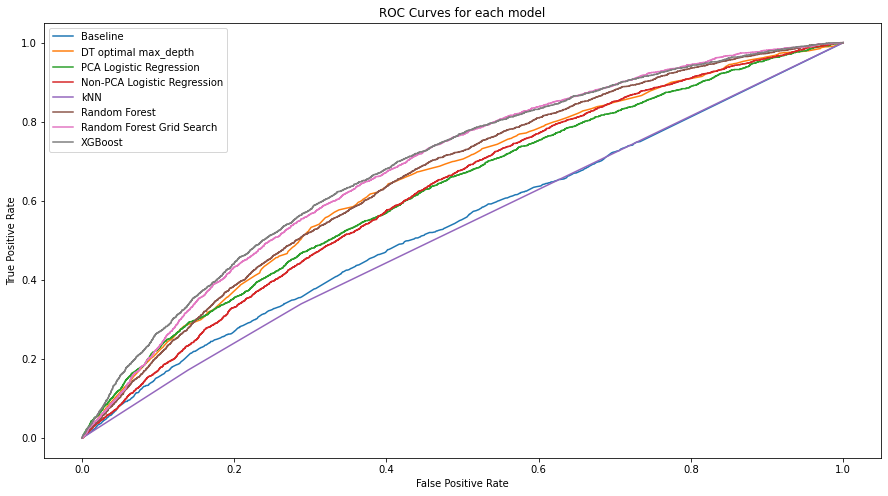

In [58]:
# plots all ROC AUC values
ax = plt.subplots(figsize = (15, 8))
ax = plt.plot(fpr1, tpr1, fpr2, tpr2, fpr4, tpr4, fpr5, tpr5, fpr6, tpr6, fpr7, tpr7, fpr8, tpr8, fpr9, tpr9)

legend = ["Baseline", "DT optimal max_depth", "PCA Logistic Regression", "Non-PCA Logistic Regression", "kNN", "Random Forest", "Random Forest Grid Search", "XGBoost"]

plt.legend(legend) # adds legend
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for each model")
plt.show()

As evident from the graph above, every model we used improved from our baseline model, aside from the k-Nearest Neighbors classifier, which was very similar to the baseline. It is also clear that our tree based models were much better in regards to the ROC AUC values.  XG Boost provided us with the best metrics here (more on this below), however, the findings are very similar to that of Random Forests especially after tuning hyperparameters with GridSearch CV. 

## Bar charts of metrics used

Now, we wanted to see the impact of each model on the metrics we used. First, we analyzed its impact on training accuracy. 

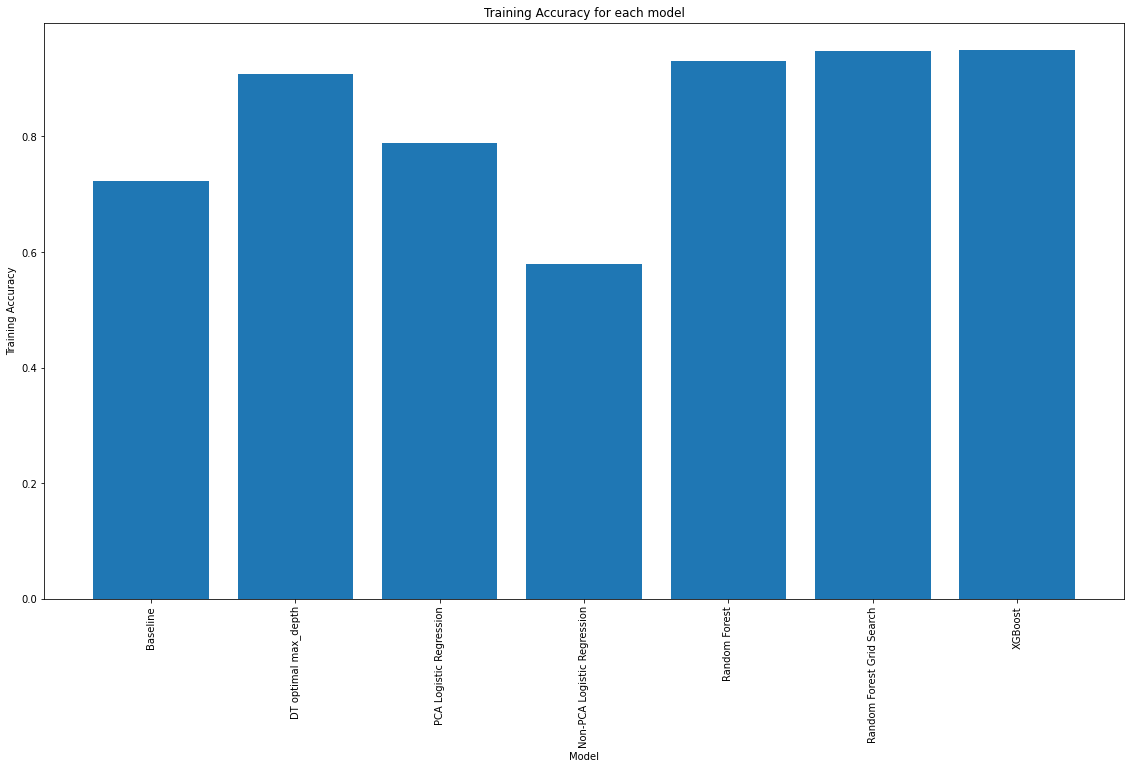

In [59]:
# plots training accuracy for each model
fig = plt.figure(figsize = (15, 8))
ax = fig.add_axes([0,0,1,1])
y_train_accuracy = legend.copy()
y_train_accuracy.remove('kNN')
train_accuracies = [train_accuracy1, train_accuracy2, train_accuracy4, train_accuracy5, train_accuracy7, train_accuracy8, train_accuracy9]
train_accuracies = [float(i) for i in train_accuracies]
ax.bar(y_train_accuracy, train_accuracies)
plt.xticks(rotation=90)
plt.title("Training Accuracy for each model")
plt.xlabel("Model")
plt.ylabel("Training Accuracy")
plt.show()

From the graph, it is clear that the tree-based models had much higher training accuracies than the logistic regression models.

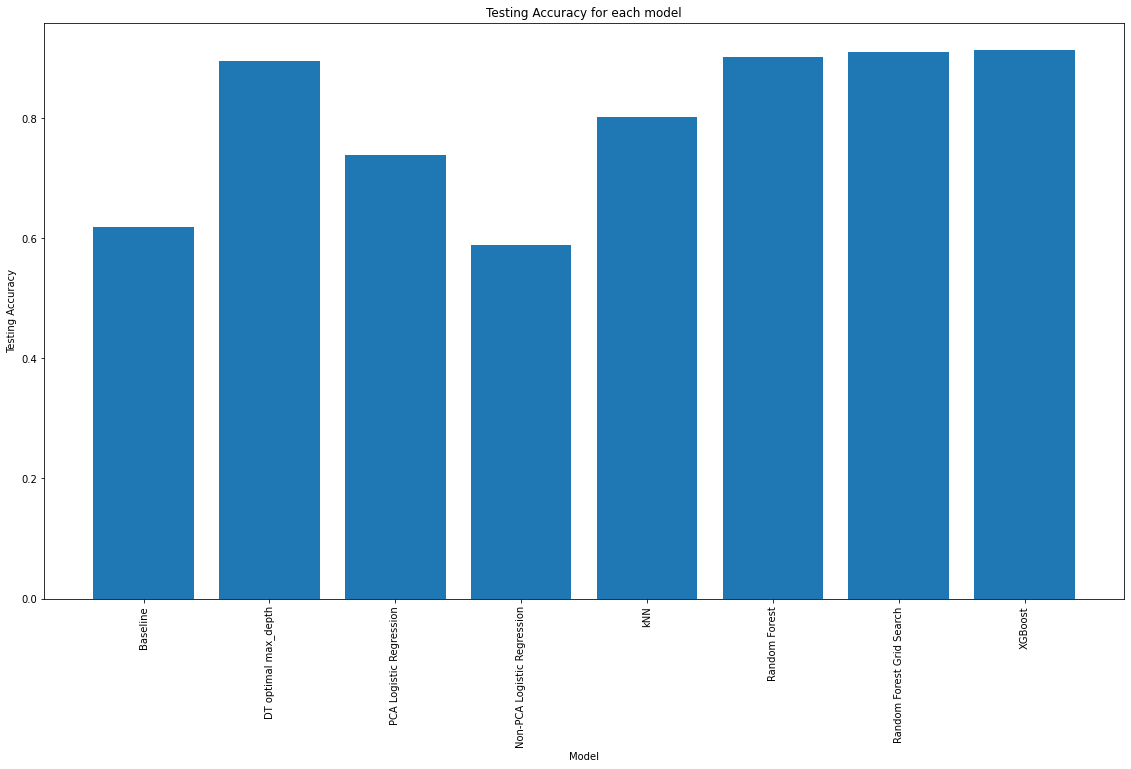

In [60]:
# plots testing accuracy for each model
fig = plt.figure(figsize = (15, 8))
ax = fig.add_axes([0,0,1,1])
y_test_accuracy = legend.copy()
test_accuracies = [test_accuracy1, test_accuracy2, test_accuracy4, test_accuracy5, test_accuracy6, test_accuracy7, test_accuracy8, test_accuracy9]
test_accuracies = [float(i) for i in test_accuracies]
ax.bar(y_test_accuracy, test_accuracies)
plt.xticks(rotation=90)
plt.title("Testing Accuracy for each model")
plt.xlabel("Model")
plt.ylabel("Testing Accuracy")
plt.show()

This makes it clear that, once again, the testing accuracies of our tree based models were much higher than the classification based models. Barring non-PCA logistic regression, every model we implemented improved our testing accuracy.

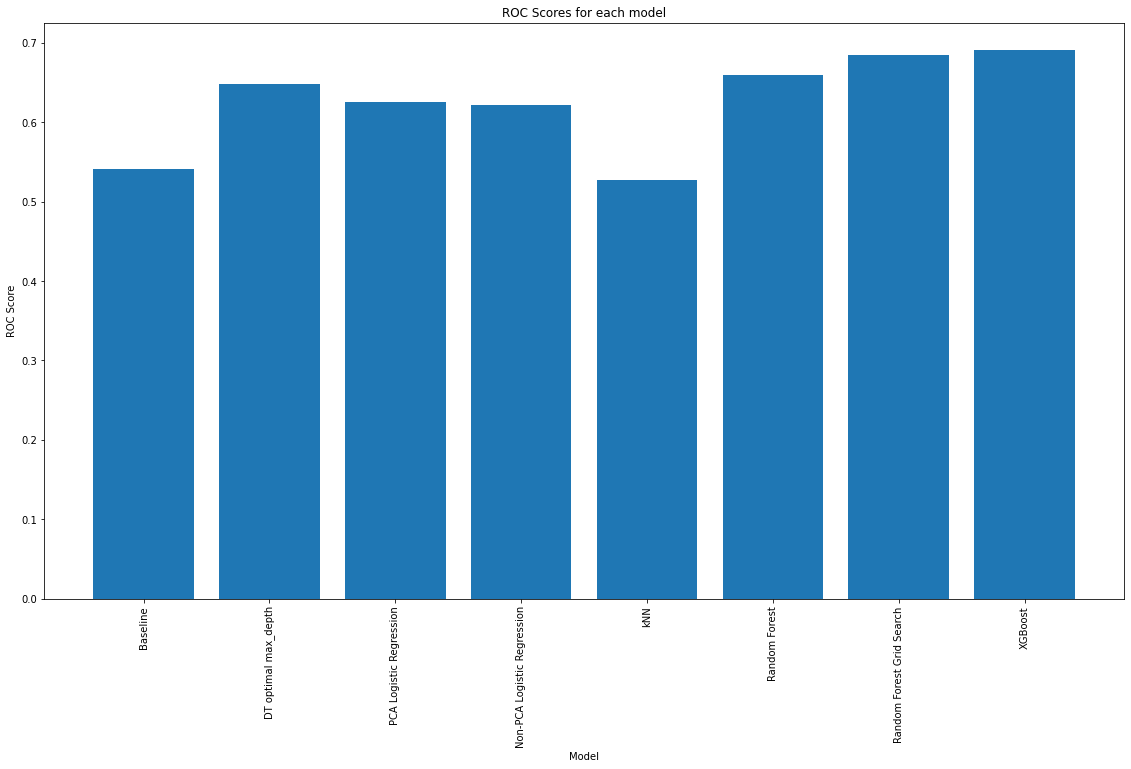

In [61]:
# plots ROC Scores for each model
fig = plt.figure(figsize = (15, 8))
ax = fig.add_axes([0,0,1,1])
y_roc = legend.copy()
roc_accuracies = [roc1, roc2, roc4, roc5, roc6, roc7, roc8, roc9]
roc_accuracies = [float(i) for i in roc_accuracies]
ax.bar(y_roc, roc_accuracies)
plt.xticks(rotation=90)
plt.title("ROC Scores for each model")
plt.xlabel("Model")
plt.ylabel("ROC Score")
plt.show()

It is evident from the graph above that all of our models, excluding kNN (which is very similar to the baseline), improve on the ROC scores - as we saw in the line chart above. This goes to show our models are working well to improve this metric. Furthermore, the tree based models are the best for measuring the ROC score.

## Findings presented in a dataframe

In [62]:
# presenting findings in dataframe
train_accuracies_null = [train_accuracy1, train_accuracy2, train_accuracy4, train_accuracy5, "NaN", train_accuracy7, train_accuracy8, train_accuracy9]
findings = {'Model': legend, 'ROC Score': roc_accuracies, 'Training Accuracy': train_accuracies_null, 'Testing Accuracy': test_accuracies}
findings_df = pd.DataFrame(data = findings)

In [63]:
display(findings_df) # displays dataframe

,Model,ROC Score,Training Accuracy,Testing Accuracy
0,Baseline,0.540969,0.722919,0.618335
1,DT optimal max_depth,0.648377,0.90864,0.894976
2,PCA Logistic Regression,0.625142,0.789371,0.738545
3,Non-PCA Logistic Regression,0.622074,0.579618,0.588339
4,kNN,0.526848,NaN,0.801162
5,Random Forest,0.658979,0.930193,0.902137
6,Random Forest Grid Search,0.684627,0.947722,0.909411
7,XGBoost,0.690865,0.949729,0.913048


Here, we display all of our findings in a neatly presented dataframe. Note that kNN has an NaN value for its Training Accuracy; this is explained further in our limitations section.

# Final Model Selected: XG Boost

Following the comparision of the models created, the highest ROC score was the primary reason for deciding upon XG Boost. It's tree based approach is well suited to the categorical variables and large number of features present in our data. Furthermore, it can be assumed that the computational efficiency, hyperparameter tuning, and gradient boost supported its success.

## Confusion Matrices

In [64]:
# confusion matrices for baseline and random forest
cm1 = metrics.confusion_matrix(y_test, y_pred1)
cm9 = metrics.confusion_matrix(y_test, y_pred9)

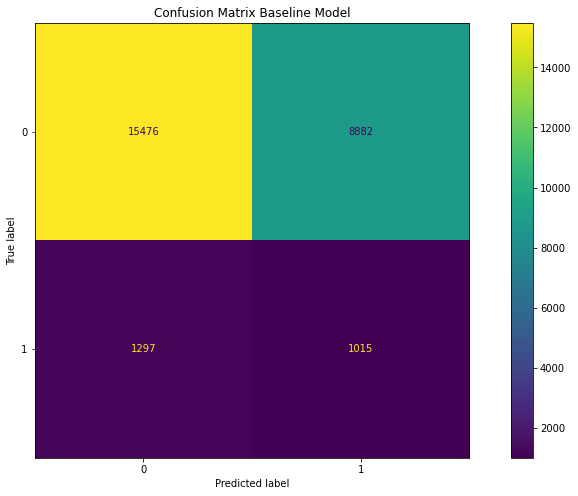

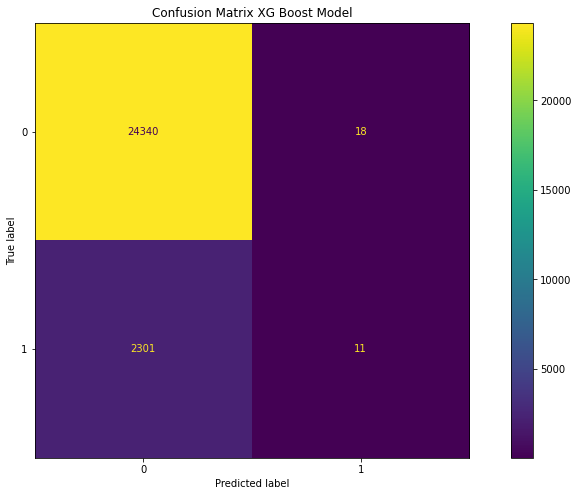

In [65]:
# displays first confusion matrix
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=[0,1],)
fig, ax = plt.subplots(figsize=(15,8))
disp1.plot(ax=ax)
plt.title("Confusion Matrix Baseline Model")
plt.show()

# displays first confusion matrix
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm9, display_labels=[0,1],)
fig, ax = plt.subplots(figsize=(15,8))
disp2.plot(ax=ax)
plt.title("Confusion Matrix XG Boost Model")
plt.show()

Here, we compare the confusion matrix from the baseline model to our best model generated using XG Boost. We see that even though XG Boost was trained on a balanced training set, it does a far better job of predicting on a test set that is highly skewed. Furthermore, we see that the false positive count decreased significantly from 8882 to 18. However, this comes at the cost of the False negative rate increasing from 1297 to 2301. Regardless, we see a large increase in total accuracy demonstrated from the correct predictions.

## Importance of Features

In [66]:
x_labels = x_train_smote.columns
feature_importance = (xgbcl.feature_importances_)

#Finding the importance of each labels
frame = {"labels": x_labels, "importance": feature_importance}

df_importance = pd.DataFrame(frame)
df_importance_sorted = df_importance.sort_values(by = "importance", ascending = False)
display(df_importance_sorted)

,labels,importance
57,NAME_INCOME_TYPE State servant,0.115206
62,NAME_EDUCATION_TYPE Academic degree,0.111465
59,NAME_EDUCATION_TYPE Lower secondary,0.083139
0,FLAG_OWN_CAR,0.059071
43,CODE_GENDER F,0.058958
...,...,...
15,FLAG_CONT_MOBILE,0.000000
46,NAME_TYPE_SUITE Family,0.000000
47,NAME_TYPE_SUITE Unaccompanied,0.000000
48,"NAME_TYPE_SUITE Spouse, partner",0.000000


Some observations we had included:

*   **DAYS_EMPLOYED**: This feature was shown to have a high importance rating in the model produced. It is interesting to see how the length of time one works for has a strong relationship with their ability to pay loans.
*   **AMT_INCOME_TOTAL**: This feature was shown to have no importance in the model produced. However, we would assume that a higher income would make an individual more likely to pay back loans.
*   **Gender**: There seems to be a considerable difference between Males and Females in their ability to pay back loans without facing any difficulty. This is reflected in the model given this feature's high importance. 

Observations that aligned with our hypothesies included:

1.   **Education Type**: As we predicted, several education types were very important in classifying loan repayment difficulties. Logically we can understand how no higher level education is the most important, given the large impact it must have on financial literacy and responsibility.
2.   **Income Type**: As we predicted, several income types, such as commerical_associate, were very important in classifying loan repayment difficulties.
3.   **Flag Variables**: Initially, we hypothesized that flag variables would not be very important when it comes to classifying. However, this wasn't true in the model given that features such as FLAG_CAR were particularly important.

# Conclusion and Wrap-up

## Conclusion
Throughout this project, we analyzed a dataset consisting of loan applicants in order to understand the behind-the-scenes process of approving a loan request. Initially, we did some EDA to identify potential patterns within the data and compare them to our preliminary knowledge of the financial aspect of loan approvals. It turned out that there are various attributes and features that affect a client's ability to pay back a loan without facing any difficulties, many of which seemed interesting and *subtle* to us. This motivated the need to build multiple models that aim to predict whether a loan applicant would face payment difficulties in paying back the loan, especially by accounting for these underlying features. We built models that account for categorical features, as well as models that account for additional continuous variables, and we continued to improve these models based on the identified metrics. Finally, we conclude that the loan approval process is more versatile than a mere dichotomy; there are so many things that factor into the possibility of ending up with having payment difficulties in paying back a loan that stretches beyond salient factors like Income and AMT Credit Amounts as outlined in the observations above. Our project tackled models that have revealed unexpected depths in our data!

## Limitations


1.   **Training accuracy for kNN**: The inability to get training accuracy for the kNN method led to an incomplete evaluation of the modeling technique. More specifically, we were unable to look into the bias-variance trade-off and decide upon whether the model was over or under fitting. Furthermore, the training accuracy could have prompted further research into models other than the random forest that was decided upon.
2.   **Lack of focus on precision**: The project is based on predicting loans that are likely to cause problems. We know that allocating loans to risky clients is more costly than not allocating loans to clients that would be proftiable. The models we developed should have also taken this into account when measuring success, though the scope of our dataset did not signify whether a loan was accepted or not. 


## Potential Extentions

1.   **Altering boundary conditions**: Specifically adressing limitation 2, it would be highly valuable to look into calculating features by setting boundaries other than 0.5 values. This would support the models in limiting false positives. A way to further explore this would to be placing a cap on false positives, and use the roc curve of the model as a way to measure the impact this would have on true positives. One potential way to implement this into the model would be to flip the TARGET variable values such that 1 corresponds to a client not having payment difficulties, and 0 corresponds to a client having payment difficulties. This valid transition would allow us to measure the ROC and cap the False Positive Ratio (FPR). 
2.   **Tuning Hyperparamters**: Further tuning of hyper parameters would be especially helpful in putting together more effective models. One great way to do this would be to use GridSearch CV. We were unable to do this for our project given the extensive runtime but it would be very valuable to do in a project with larger scale.
3.   **Smoting Ratio**: Currently the project smotes the training set to make a 50/50 split. It would be valuable to see how a 2:1 ratio would have on the testing accuracies given how skewed the original data set is. It is important to ensure that this doesn't make the models predict the majority class. 

Thank you for taking the time to go through our project!